In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
#winter Jan + Feb 
df_1=pd.read_csv('201501-citibike-tripdata.csv')
df_2=pd.read_csv('201502-citibike-tripdata.csv')

#summer July + Aug
df_3=pd.read_csv('201507-citibike-tripdata.csv')
df_4=pd.read_csv('201508-citibike-tripdata.csv')

In [4]:
df_1['age'] = 2015-df_1['birth year'][(df_1['usertype'] == 'Subscriber')]
df_2['age'] = 2015-df_2['birth year'][(df_2['usertype'] == 'Subscriber')]
df_3['age'] = 2015-df_3['birth year'][(df_3['usertype'] == 'Subscriber')]
df_4['age'] = 2015-df_4['birth year'][(df_4['usertype'] == 'Subscriber')]

In [5]:
df_1.adj=np.random.choice(df_1.age[~np.isnan(df_1.age)],len(df_1.age[~np.isnan(df_1.age)]), replace=False)
df_2.adj=np.random.choice(df_2.age[~np.isnan(df_2.age)],len(df_2.age[~np.isnan(df_2.age)]), replace=False)
df_3.adj=np.random.choice(df_3.age[~np.isnan(df_3.age)],len(df_3.age[~np.isnan(df_3.age)]), replace=False)
df_4.adj=np.random.choice(df_4.age[~np.isnan(df_4.age)],len(df_4.age[~np.isnan(df_4.age)]), replace=False)

In [6]:
#checking age colomn was added
df_1.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.75002,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2,55


In [7]:
#combining data frames for winter and summer 
winter = pd.concat([df_1, df_2], axis=0)

In [8]:
summer = pd.concat([df_3, df_4], axis=0)

In [9]:
winter.starttime.max()

'2/9/2015 9:59'

In [10]:
winter.starttime.min()

'1/1/2015 0:01'

In [11]:
summer.starttime.max()

'8/9/2015 23:59:57'

In [12]:
summer.starttime.min()

'7/1/2015 00:00:03'

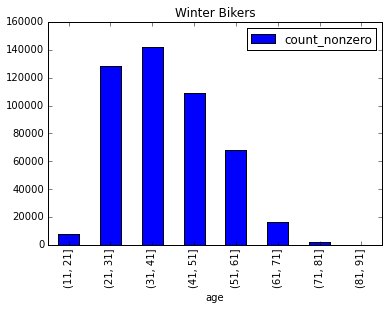

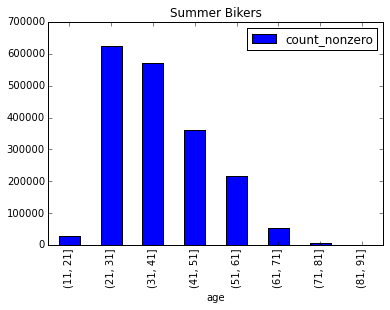

In [13]:
bins = np.arange(11, 100, 10)
winter.age.groupby(pd.cut(winter.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter Bikers")
W_age_dist = winter.age.groupby(pd.cut(winter.age, bins)).agg([count_nonzero])
summer.age.groupby(pd.cut(summer.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer Bikers")
S_age_dist = summer.age.groupby(pd.cut(summer.age, bins)).agg([count_nonzero])

The data shows that during winter time more older bikers chose to use citi-bike services. This can be explained by the cold and people prefreing to get faster from one point to another (biking over walking). However we nedd to keeo in mind that the amount of people using citibike during winter is significly lower than summer (for our test summer n is nearly 4 times bigger than winter)

In [14]:
summer.age.count()

1863354

In [15]:
winter.age.count()

474587

In [16]:
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "Is winter normal?", ksW
print "Is summer normal?", ksS

Is winter normal? KstestResult(statistic=1.0, pvalue=0.0)
Is summer normal? KstestResult(statistic=1.0, pvalue=0.0)


Wired thing has happen to me while runing this- not completely sure why. 
When trying to change the bin start from 0 anf not 11 the KS tests apered as an eror (nan as results).. 
As P-value is 0 for both tests we will reject the null- maening that our dis is not Normal.

print scipy.stats.anderson(S_age_dist, dist='norm')
#print "anderson",scipy.stats.anderson(S_age_dist, dist='norm')
#print "anderson",scipy.stats.anderson(W_age_dist, dist='norm')
print ""

In [ ]:
print ("anderson",scipy.stats.anderson(S_age_dist,dist='expon'))
print ("anderson",scipy.stats.anderson(W_age_dist,dist='expon'))
print ("")